In [1]:
pwd

'/home/alex/gargaml/examples'

In [2]:
cd ..


/home/alex/gargaml


In [3]:
import gargaml
from gargaml import *
from gargaml import Data

In [4]:
X, y = Data().Load.titanic(True, precleaning=True)

In [5]:
X.drop(columns="passengerid", inplace=True)
X.sample(10)

,sex,embarked,pclass,age,sibsp,parch,fare
218,female,C,1,32.0,0,0,76.2917
870,male,S,3,26.0,0,0,7.8958
274,female,Q,3,NaN,0,0,7.7500
432,female,S,2,42.0,1,0,26.0000
848,male,S,2,28.0,0,1,33.0000
215,female,C,1,31.0,1,0,113.2750
609,female,S,1,40.0,0,0,153.4625
695,male,S,2,52.0,0,0,13.5000
45,male,S,3,NaN,0,0,8.0500
678,female,S,3,43.0,1,6,46.9000


In [6]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [7]:
y.value_counts(normalize=True).round(2)

survived
0    0.62
1    0.38
Name: proportion, dtype: float64

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   embarked  889 non-null    object 
 2   pclass    891 non-null    int64  
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


<Axes: >

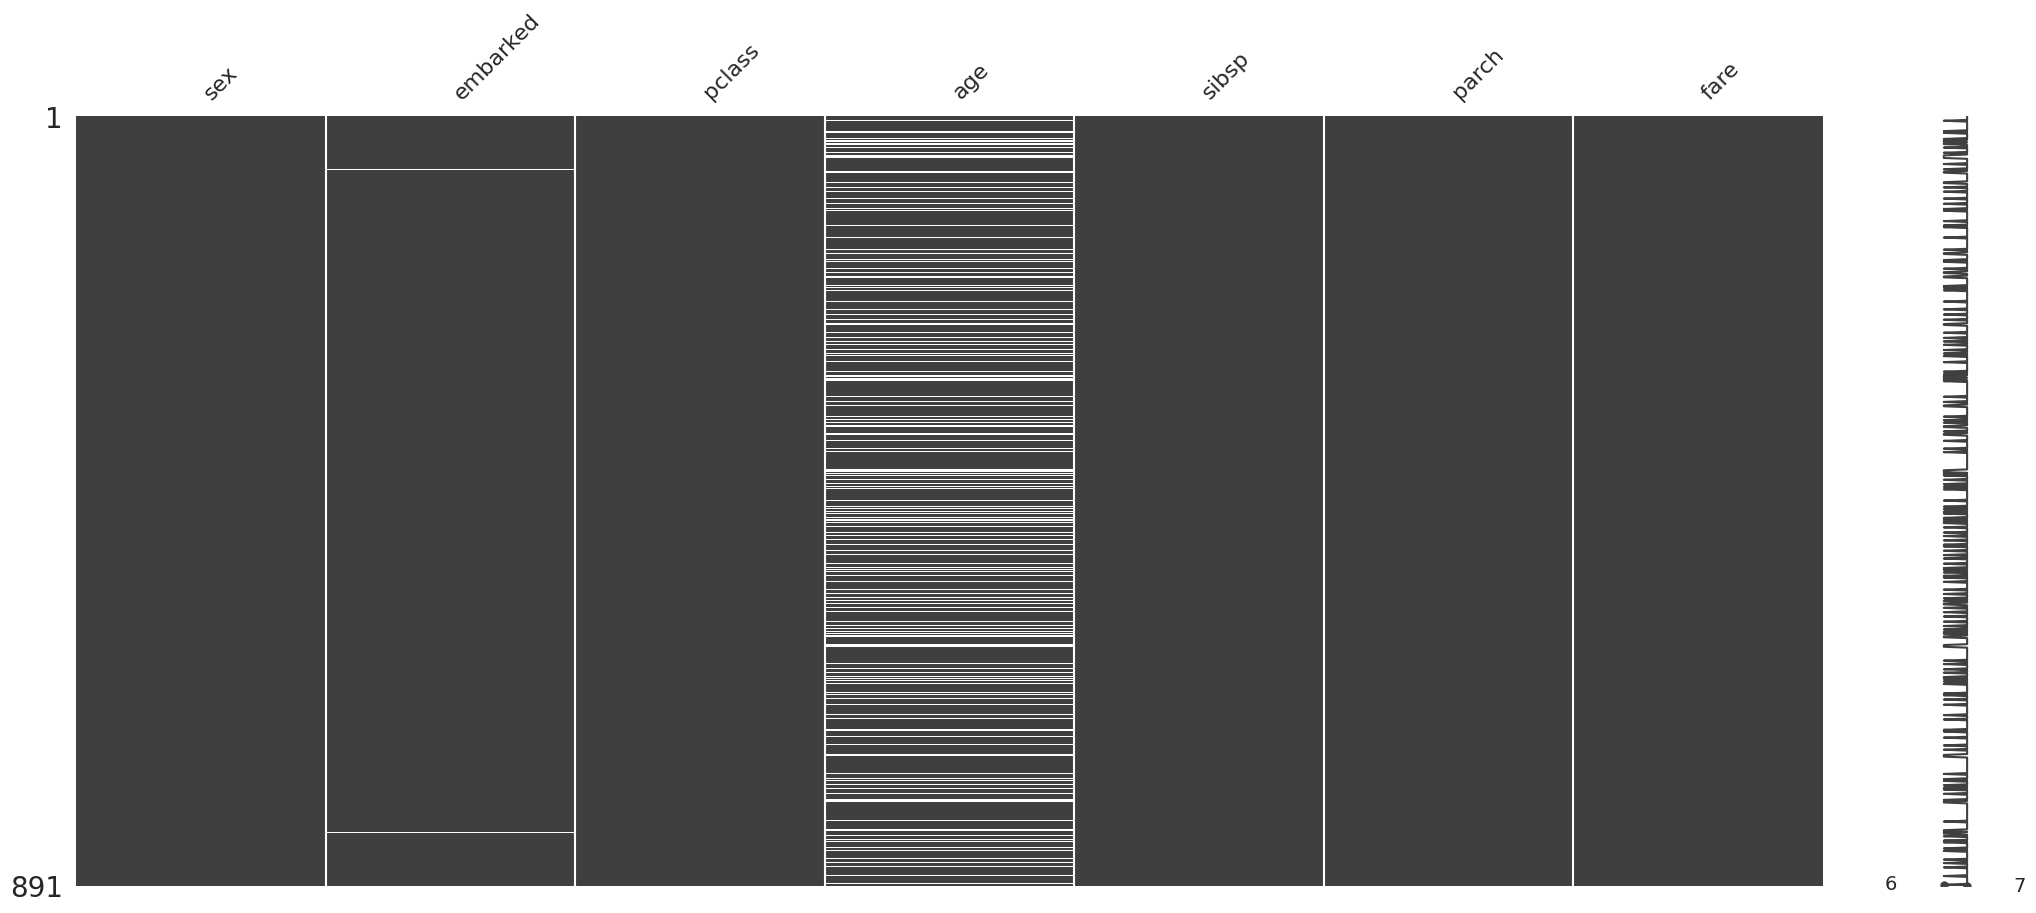

In [9]:
msno.matrix(X)

In [10]:
X["fare_by_age"] = X.fare/ X.age
X["fare_by_pclass"] = X.fare/X.pclass 
X["fare_null"] = (X.fare == 0).astype(int)
X["age_is_nan"] = X.age.isna().astype(int)
X.describe()

,pclass,age,sibsp,parch,fare,fare_by_age,fare_by_pclass,fare_null,age_is_nan
count,891.000000,714.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,2.391841,25.046650,0.016835,0.198653
std,0.836071,14.526497,1.102743,0.806057,49.693429,8.115102,51.245594,0.128725,0.399210
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.342403,2.641667,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.565217,6.325000,0.000000,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.673857,23.183333,0.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,164.728261,512.329200,1.000000,1.000000


array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

 1    0.9
-1    0.1
Name: proportion, dtype: float64

In [39]:
detector = IsolationForest

tmp =KNNImputer().fit_transform(X.select_dtypes(np.number))
ee = detector.fit_predict(tmp)
ee

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

Init signature:
IsolationForest(
    *,
    n_estimators=100,
    max_samples='auto',
    contamination='auto',
    max_features=1.0,
    bootstrap=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
)
Docstring:     
Isolation Forest Algorithm.

Return the anomaly score of each sample using the IsolationForest algorithm

The IsolationForest 'isolates' observations by randomly selecting a feature
and then randomly selecting a split value between the maximum and minimum
values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the
number of splittings required to isolate a sample is equivalent to the path
length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a
measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies.
Hence, when a forest of random trees collectively produce shorter path
len

In [34]:
ee = pd.Series(ee).apply(lambda i : False if i==1 else True)
ee

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Length: 891, dtype: bool

In [35]:
X_1 = X.loc[ee.values]
X_1

,sex,embarked,pclass,age,sibsp,parch,fare,fare_by_age,fare_by_pclass,fare_null,age_is_nan
7,male,S,3,2.0,3,1,21.0750,10.537500,7.025000,0,0
13,male,S,3,39.0,1,5,31.2750,0.801923,10.425000,0,0
16,male,Q,3,2.0,4,1,29.1250,14.562500,9.708333,0,0
25,female,S,3,38.0,1,5,31.3875,0.825987,10.462500,0,0
27,male,S,1,19.0,3,2,263.0000,13.842105,263.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
850,male,S,3,4.0,4,2,31.2750,7.818750,10.425000,0,0
856,female,S,1,45.0,1,1,164.8667,3.663704,164.866700,0,0
863,female,S,3,NaN,8,2,69.5500,NaN,23.183333,0,1
885,female,Q,3,39.0,0,5,29.1250,0.746795,9.708333,0,0


In [36]:
X_1.describe().astype(int)

,pclass,age,sibsp,parch,fare,fare_by_age,fare_by_pclass,fare_null,age_is_nan
count,154,104,154,154,154,104,154,154,154
mean,2,21,1,1,79,10,67,0,0
std,0,18,2,1,94,19,99,0,0
min,1,0,0,0,0,0,0,0,0
25%,1,4,0,0,25,2,8,0,0
50%,2,18,1,1,39,5,15,0,0
75%,3,38,3,2,110,13,110,0,1
max,3,70,8,6,512,164,512,1,1


In [37]:
X_2 = X.loc[~ee.values]
X_2

,sex,embarked,pclass,age,sibsp,parch,fare,fare_by_age,fare_by_pclass,fare_null,age_is_nan
0,male,S,3,22.0,1,0,7.2500,0.329545,2.416667,0,0
1,female,C,1,38.0,1,0,71.2833,1.875876,71.283300,0,0
2,female,S,3,26.0,0,0,7.9250,0.304808,2.641667,0,0
3,female,S,1,35.0,1,0,53.1000,1.517143,53.100000,0,0
4,male,S,3,35.0,0,0,8.0500,0.230000,2.683333,0,0
...,...,...,...,...,...,...,...,...,...,...,...
884,male,S,3,25.0,0,0,7.0500,0.282000,2.350000,0,0
886,male,S,2,27.0,0,0,13.0000,0.481481,6.500000,0,0
887,female,S,1,19.0,0,0,30.0000,1.578947,30.000000,0,0
889,male,C,1,26.0,0,0,30.0000,1.153846,30.000000,0,0


In [38]:
X_2.describe().astype(int)

,pclass,age,sibsp,parch,fare,fare_by_age,fare_by_pclass,fare_null,age_is_nan
count,737,610,737,737,737,610,737,737,737
mean,2,31,0,0,22,0,16,0,0
std,0,13,0,0,23,1,25,0,0
min,1,2,0,0,4,0,1,0,0
25%,2,22,0,0,7,0,2,0,0
50%,3,29,0,0,13,0,5,0,0
75%,3,38,1,0,26,1,13,0,0
max,3,80,4,3,153,8,153,0,1


In [ ]:
del X_1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
X_train.isna().mean().round(4)

In [ ]:
y_train

In [ ]:
imputer = KNNImputer()

cols = X_train.select_dtypes(include=np.number).columns
display(cols)

# imputer.fit(X_train.select_dtypes(include=np.number))
# X_train = imputer.transform(X_train.select_dtypes(include=np.number))

X_train = imputer.fit_transform(X_train.select_dtypes(include=np.number))
X_test = imputer.transform(X_test.select_dtypes(include=np.number))
X_train

In [ ]:
X_train.shape

In [ ]:
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)
X_train

In [ ]:
X_train.isna().sum()

In [ ]:
y_train.value_counts(normalize=True).round(2)

In [ ]:
y_test.value_counts(normalize=True).round(2)

In [ ]:
estimator = LogisticRegression()
estimator.fit(X_train, y_train)

In [ ]:
y_pred_train = estimator.predict(X_train)
y_pred_train

In [ ]:
y_train

In [ ]:
estimator.score(X_train, y_train).round(2)

In [ ]:
estimator.score(X_test, y_test).round(2)

In [ ]:
scaler = StandardScaler()  # QuantileTransformer(n_quantiles=100)
# scaler = MinMaxScaler()  # QuantileTransformer(n_quantiles=100)

# scaler.fit(X_train)
# X_train_sca = scaler.transform(X_train)
X_train_sca = scaler.fit_transform(X_train)
X_test_sca = scaler.transform(X_test)

In [ ]:
X_train_sca = pd.DataFrame(X_train_sca, columns=cols)
X_test_sca = pd.DataFrame(X_test_sca, columns=cols)
X_train_sca

In [ ]:
X_train.describe().round(1)

In [ ]:
X_train_sca.describe().round(1)

In [ ]:
from IPython.display import display

estimator = RandomForestClassifier()
estimator.fit(X_train_sca, y_train)

display(estimator.score(X_train_sca, y_train).round(2))
display(estimator.score(X_test_sca, y_test).round(2))

In [ ]:
# estimator = LogisticRegression()
# estimator.fit(X_train_sca, y_train)

# display(estimator.score(X_train_sca, np.log1p(y_train).astype(int)))
# display(estimator.score(X_test_sca, np.log1p(y_test).astype(int)))

In [ ]:
y_train

In [ ]:
# np.log1p(y_train).astype(int).value_counts()

In [ ]:
grid = GridSearchCV(
    LogisticRegression(),
    {},
    cv=10, # StratifiedShuffleSplit(n_splits=10, test_size=0.3)
    n_jobs=4,
    verbose=2,
    return_train_score=True,
)
grid.fit(X_train, y_train)

In [ ]:
grid.best_estimator_

In [ ]:
display(grid.score(X_train, y_train))
display(grid.score(X_test, y_test))

In [ ]:
display(grid.best_estimator_.score(X_train, y_train))
display(grid.best_estimator_.score(X_test, y_test))

In [ ]:
grid.cv_results_

In [ ]:
res = pd.DataFrame(grid.cv_results_).round(2)
res

In [ ]:
cols = [i for i in res.columns if "split" not in i]
res = res.loc[:, cols]
res

In [ ]:
def resultize(grid):
    """from a fited grid search build / return a fancy dataframe of results"""

    res = pd.DataFrame(grid.cv_results_).round(2)
    cols = [i for i in res.columns if "split" not in i]
    res = res.loc[:, cols]

    res = res.sort_values("mean_test_score", ascending=False)

    return res

In [ ]:
blabla = resultize(grid)
blabla

In [ ]:
pipe = Pipeline(
    [
        # ("sampler", RandomUnderSampler()),
        ("imputer", KNNImputer()),
        ("scaler", StandardScaler()),
        ("estimator", LogisticRegression()),
    ]
)

pipe

In [ ]:
grid = GridSearchCV(pipe, {}, cv=10, n_jobs=-1, verbose=2, return_train_score=True)
grid.fit(X.select_dtypes(include=np.number), y)

In [ ]:
resultize(grid)

In [ ]:
li = [
    # ("sampler", RandomUnderSampler()),
    ("imputer", KNNImputer()),
    ("scaler", StandardScaler()),
    ("estimator", LogisticRegression()),
]

pipe = Pipeline(
    li
)
pipe

In [ ]:
param_grid = {


    # "estimator": [LogisticRegression()],
    


    # "sampler": ["passthrough", RandomUnderSampler()],
    
    "imputer": [
        KNNImputer(),
        SimpleImputer(strategy="mean"),
        SimpleImputer(strategy="median"),
    ],
}
param_grid

In [ ]:
# def cv():
#     return StratifiedShuffleSplit(n_splits=10, test_size=0.3)

In [ ]:
N_JOBS = -1
VERBOSE = 1
CV = 10

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=CV,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)
grid.fit(X.select_dtypes(include=np.number), y)
resultize(grid)

In [ ]:
param_grid = {
    "estimator": [LogisticRegression(), ], # RandomForestClassifier()
    #

    # "sampler": ["passthrough", RandomUnderSampler()],
    
    "imputer": [KNNImputer(), SimpleImputer()],
    
    "scaler": [
        StandardScaler(),
        Normalizer(),
        QuantileTransformer(n_quantiles=100),
        MinMaxScaler(),
        "passthrough",
    ],
}
param_grid

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=CV,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)

grid.fit(X.select_dtypes(include=np.number), y)
resultize(grid)

In [ ]:
param_grid = {
    # "imputer"  : [KNNImputer(), SimpleImputer()],
    # "scaler" : [StandardScaler(), Normalizer(), QuantileTransformer(n_quantiles=100), "passthrough"],  # MinMaxScaler()
    "estimator": [
        DummyClassifier(),
        LogisticRegression(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
    ]
}
param_grid

In [ ]:
grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=CV, n_jobs=-1, verbose=1, return_train_score=True
)
grid.fit(X.select_dtypes(include=np.number), y)
resultize(grid)

In [ ]:
param_grid = {
    
    # "sampler": ["passthrough", RandomUnderSampler()],

    "imputer": [KNNImputer(), SimpleImputer()],

    "scaler": [
        StandardScaler(),
        Normalizer(),
        QuantileTransformer(n_quantiles=100),
        "passthrough",
    ],  # MinMaxScaler()
    
    "estimator": [
        LogisticRegression(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
    ],  # DummyClassifier()
}
param_grid

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=CV,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)
grid.fit(X.select_dtypes(include=np.number), y)
resultize(grid).sort_values("mean_test_score", ascending=False).head()

In [ ]:
resultize(grid).sort_values("mean_test_score", ascending=False)

In [ ]:
pd.get_dummies(X)

In [ ]:
pipe

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=CV,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)
grid.fit(pd.get_dummies(X), y)
resultize(grid).head()

In [ ]:
param_grid = {
    "sampler": [
        "passthrough",
    ],  # RandomUnderSampler()
    "imputer": [
        KNNImputer(),
    ],
    "scaler": [
        StandardScaler(),
        Normalizer(),
        QuantileTransformer(n_quantiles=100),
        "passthrough",
    ],
    "estimator": [
        KNeighborsClassifier(),
        RandomForestClassifier(),
        XGBClassifier(),
    ],  # LogisticRegression(),
}

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=cv(),
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)
grid.fit(pd.get_dummies(X), y)
resultize(grid).head()

In [ ]:
param_grid = {
    # "sampler": [
    #     "passthrough",
    # ],  # RandomUnderSampler()
    "imputer": [
        KNNImputer(),
    ],
    "scaler": [
        StandardScaler(),
        Normalizer(),
        QuantileTransformer(n_quantiles=100),
        "passthrough",
    ],
    "estimator": [
        KNeighborsClassifier(),
    ],  # LogisticRegression(),

    "estimator__n_neighbors" : [3, 5, 7, 10, 15, 20],
    "imputer__n_neighbors" :  [3, 5, 7, 10, 15, 20],
}
param_grid

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=CV,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)
grid.fit(pd.get_dummies(X), y)
resultize(grid).head()

In [ ]:
sns.displot(X.age)

In [ ]:
X.age.skew().round(1)

In [ ]:
X.fare.skew()

In [ ]:
sns.displot(X.sibsp)

In [ ]:
for col in X.select_dtypes(np.number).columns : 
    
    txt = f"{col} ==> {X[col].skew():.2f}"
    print(txt)

In [ ]:
DISPLAY = False 

if DISPLAY : 
    sns.pairplot(X, corner=True)

In [ ]:
sns.displot(X.fare)

In [ ]:
sns.displot(np.log1p(X.fare))

In [ ]:
X["equipage"] = (X.fare ==0).astype(int)
X

In [ ]:
X.loc[X.equipage == 1]

In [ ]:
X_transf = X.copy()
X_transf["fare"] = np.log1p(X_transf["fare"])
X_transf

In [ ]:
X_transf["sex"] = X_transf["sex"].apply(lambda i : 1 if i =="male" else 0)
X_transf

In [ ]:
param_grid = {
    "sampler": [
        "passthrough",
    ],  # RandomUnderSampler()
    "imputer": [
        KNNImputer(),
    ],
    "scaler": [
        StandardScaler(),
        Normalizer(),
        QuantileTransformer(n_quantiles=100),
        "passthrough",
    ],
    "estimator": [
        XGBClassifier(), 
        RandomForestClassifier(), 
        KNeighborsClassifier(),
    ],  # LogisticRegression(),

    # "estimator__n_neighbors" : [3, 5, 7, 10, 15, 20],
    # "imputer__n_neighbors" :  [3, 5, 7, 10, 15, 20],
}
param_grid

In [ ]:
pipe

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=cv(),
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)

grid.fit(pd.get_dummies(X), y)
resultize(grid).head()

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=cv(),
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)

grid.fit(pd.get_dummies(X_transf), y)
resultize(grid).head()

In [ ]:
def resultize(grid, log_target=0, transf=0, features=""):
    """ """

    res = pd.DataFrame(grid.cv_results_).round(2)
    cols = [i for i in res.columns if "split" not in i]
    res = res.loc[:, cols]

    ######################
    ######################

    res["log_target"] = log_target
    res["transf"] = transf
    res["features"] = features

    ######################
    ######################

    return res.sort_values("mean_test_score", ascending=False)

In [ ]:
RES = pd.DataFrame()

In [ ]:
param_grid

In [ ]:
pipe

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=CV,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)

grid.fit(pd.get_dummies(X), y)
res = resultize(grid, log_target=0, transf=0, features="dummies")


RES = pd.concat([RES, res], axis=0, ignore_index=True)
res.head()

In [ ]:
RES

In [ ]:
RES.iloc[:, -3:].nunique()

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=cv(),
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)

grid.fit(pd.get_dummies(X_transf), y)
res = resultize(grid, log_target=0, transf=0, features="dummies")


RES = pd.concat([RES, res], axis=0, ignore_index=True)
res.head()

In [ ]:
grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, return_train_score=True
)
grid.fit(X.select_dtypes(include=np.number), y)

res = resultize(grid, log_target=0, transf_fare=0, features="only_num")


RES = pd.concat([RES, res], axis=0, ignore_index=True)
res.head()

In [ ]:
# grid = GridSearchCV(
#     pipe, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, return_train_score=True
# )
# _y = np.log1p(y).astype(int)
# grid.fit(X.select_dtypes(include=np.number), _y)

# res = resultize(grid, log_target=1, transf_fare=0, features="only_num")


# RES = pd.concat([RES, res], axis=0, ignore_index=True)
# res.head()

In [ ]:
RES.iloc[:, -3:].nunique()

In [ ]:
RES.transf.value_counts()

In [ ]:
# RandomForestClassifier()	KNNImputer()	"passthrough"  "0"	"1"	"dummies"

In [ ]:
pca_pipe = Pipeline(
    [    
        # ("sampler", RandomUnderSampler()),
        # ("selector", ColumnSelector(threshold=0.33)),
        # ("preprocessor", preprocessor),
        ("imputer", KNNImputer()),
        ("scaler", StandardScaler()),
        ("reductor", PCA()), 
        ("estimator", LogisticRegression()),
    ]
)


In [ ]:
param_grid = {
    # "sampler": [
    #     "passthrough",
    # ],  # RandomUnderSampler()

    "imputer": [
        KNNImputer()
    ],

    "reductor": [PCA(svd_solver = 'full')],

    "scaler": [
        StandardScaler(),
        QuantileTransformer(n_quantiles=100),
        "passthrough",
    ],         # Normalizer(),

    "estimator": [
        # XGBClassifier(), 
        # RandomForestClassifier(), 
        KNeighborsClassifier(),
    ],  # LogisticRegression(),

    "reductor__n_components" :    [0.85, 0.9, 0.95, 0.99], # 0.5, 0.7, 0.8

    "estimator__n_neighbors" : [3, 5, 7, 10, 15, 20],
    # "imputer__n_neighbors" :  [3, 5, 7, 10, 15, 20],
}
param_grid

In [ ]:
grid = GridSearchCV(
    pca_pipe,
    param_grid=param_grid,
    cv=10,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)

grid.fit(pd.get_dummies(X), y)
res = resultize(grid, log_target=0, transf=0, features="dummies")
RES = pd.concat([RES, res], axis=0, ignore_index=True)
display(res.head())

grid.fit(pd.get_dummies(X_transf), y)
res = resultize(grid, log_target=0, transf=1, features="dummies")
RES = pd.concat([RES, res], axis=0, ignore_index=True)

display(res.head())

In [ ]:
# param_grid = {
#     "estimator__n_estimators": [100, 150, 200, 300, 400, 500],
#     "imputer": [
#         KNNImputer(),
#     ],
#     "scaler": [
#         "passthrough",
#     ],
#     "estimator": [
#         RandomForestClassifier(),
#     ],
# }
# param_grid

In [ ]:
grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, return_train_score=True
)
grid.fit(X.select_dtypes(include=np.number), y)
res = resultize(grid, log_target=0, transf=0, features="only_num")
RES = pd.concat([RES, res], axis=0, ignore_index=True)
display(res.head())

grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, return_train_score=True
)
grid.fit(pd.get_dummies(X), y)
res = resultize(grid, log_target=0, transf=0, features="dummies")
RES = pd.concat([RES, res], axis=0, ignore_index=True)
display(res.head())


grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, return_train_score=True
)
grid.fit(X_transf.select_dtypes(include=np.number), y)
res = resultize(grid, log_target=0, transf=1, features="only_num")
RES = pd.concat([RES, res], axis=0, ignore_index=True)
display(res.head())

grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, return_train_score=True
)
grid.fit(pd.get_dummies(X_transf), y)
res = resultize(grid, log_target=0, transf=1, features="dummies")
RES = pd.concat([RES, res], axis=0, ignore_index=True)
display(res.head())

In [ ]:
RES = RES.loc[RES.log_target == 0]
RES.sort_values("mean_test_score", ascending=False)

In [ ]:
df = Data.Load.food(False)
DF = df.copy()
df

In [ ]:
df = DF.copy()

In [ ]:
df.product_name = df.product_name.fillna("unknown")


In [ ]:

df.loc[df.product_name.str.lower().str.contains("nutell")]

In [ ]:
cols = ['energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', ]
df = df.dropna(axis=0, how="all", subset=cols)


cols = ["product_name", 'additives_n', 
'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1',
'energy_100g', 'fat_100g',
'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g', ]




df.product_name = df.product_name.fillna("unknown")
df = df.loc[:, cols]
df

In [ ]:
df.loc[df.product_name.str.lower().str.contains("nutell")]

In [ ]:
x= df.iloc[:, -9:-1]
x

In [ ]:
x = SimpleImputer(strategy="median").fit_transform(x)
ee = EllipticEnvelope().fit_predict(x)
# pd.Series(ee).value_counts()


ee= [True if i == 1 else False for i in ee ]
pd.Series(ee).value_counts().round(2)

In [ ]:
len(ee)

In [ ]:
len(df)

In [ ]:
df = df.loc[ ee , :  ]
df

In [ ]:
norm = df.loc[df.nutrition_grade_fr.notna()]
norm.describe().round(1)

In [ ]:
df.nutrition_grade_fr  = df.nutrition_grade_fr.fillna('zz')

In [ ]:
_df = df.copy()
_df = _df.sort_values("nutrition_grade_fr")
_df["is_zz"]= _df.nutrition_grade_fr=="zz"

px.box(_df, x="pnns_groups_1", y ="energy_100g")

In [ ]:

px.box(_df, x="is_zz", y ="energy_100g")

In [ ]:
px.box(_df, x="is_zz", y ="sugars_100g")

In [ ]:
px.box(_df, x="is_zz", y ="fat_100g")

In [ ]:
px.box(_df, color="is_zz", y ="energy_100g" ,x="pnns_groups_1")

In [ ]:
px.box(_df, color="is_zz", y ="sugars_100g" ,x="pnns_groups_1")

In [ ]:
px.box(_df, color="is_zz", y ="fat_100g" ,x="pnns_groups_1")


In [ ]:
px.box(_df, color="is_zz", y ="sugars_100g" ,x="pnns_groups_1")

In [ ]:
px.box(_df, x="nutrition_grade_fr", y ="fat_100g" )

In [ ]:
_df = df.loc[df.nutrition_grade_fr.notna()]
_df = _df.sort_values("nutrition_grade_fr")
px.box(_df, x="nutrition_grade_fr", y ="fat_100g" )

In [ ]:
df.product_name = df.product_name.fillna("unknown")

# df.product_name = df.product_name.apply(clean)
# df.product_name = df.product_name.apply(lambda i : i.lower())
df.product_name = df.product_name.str.lower()
df

In [ ]:
_df = df.copy()

_df = _df.loc[df.product_name.str.startswith("huile"), :]
_df = _df.loc[df.product_name.str.contains("olive"), :]

_df = _df.loc[_df.energy_100g.notna()]
_df

In [ ]:
_df = _df.loc[_df.energy_100g.notna()
              ]
_df

In [ ]:
px.box(_df.energy_100g)

In [ ]:
numeric_features = ["age", "fare"]
categorical_features = ["embarked", "sex", "pclass"]


# numeric_transformer = Pipeline(
#     steps=[("imputer", KNNImputer()), 
#            ("scaler", StandardScaler())]
# )
numeric_transformer = Pipeline(
    steps=[("passthrough", "passthrough"), 
        #    ("scaler", StandardScaler()), 
           ]
)

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        # ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

preprocessor

In [ ]:
preprocessor

In [ ]:
pipe = Pipeline(
    [
        # ("sampler", RandomUnderSampler()),
        ("preprocessor", preprocessor)
        ("imputer", KNNImputer()),
        ("scaler", StandardScaler()),
        ("estimator", LogisticRegression()),
    ]
)





y 
y_log

X_log  = mis au log certains features =)=> 
X_raw =  ans log feats


1 / modeles + simple > compiqué 

    * dummy 
    * regreslion lineaire que numérique pourie  (baseline )
    * gtravailler sur pipes diiférents / estifmateurs metatprametre y log sans log X raw X log 
    ==> 1 OU plusieurs modeles performats


2/ impact energy star score
    la version ou tu jette Energy star SCORERS
    La verison ou tu gardes enrgy star socre (==> KNNIMPUTER)

In [ ]:
1 / modeles + simple > compiqué 

    * dummy 
    * regreslion lineaire que numérique pourie  (baseline )
    * gtravailler sur pipes diiférents / estifmateurs metatprametre y log sans log X raw X log 
    ==> 1 OU plusieurs modeles performats


2/ impact energy star score
    la version ou tu jette Energy star SCORERS
    La verison ou tu gardes enrgy star socre (==> KNNIMPUTER)